In [2]:
import tensorflow as tf 
from tensorflow.keras.datasets import cifar10


In [3]:
(x_train,y_train),(x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 73s 0us/step


In [4]:
# Display the shape of the training and test datasets
print(f"Training data shape: {x_train.shape}")
print(f"Test data shape: {x_test.shape}")

Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)


In [5]:
import matplotlib.pyplot as plt


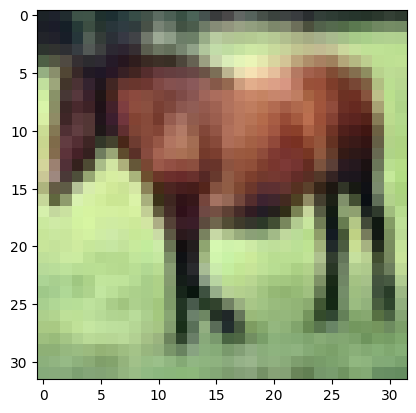

In [7]:
plt.imshow(x_train[7])

In [8]:
x_train[0].max()

255

In [9]:
x_train = x_train/255
x_test = x_test/255 

In [10]:
from tensorflow.keras.utils import to_categorical


In [11]:
y_cat_train = to_categorical(y_train,10)
y_cat_test = to_categorical(y_test,10)

In [12]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [13]:
model = Sequential()


In [14]:


model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu',))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu',))
model.add(MaxPool2D(pool_size=(2,2)))

#flatten 
model.add(Flatten())

#dense 
model.add(Dense(units=128, activation='relu'))
#output layer 
model.add( Dense(units=10, activation='softmax'))

#compile 
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 128)               1

In [16]:
from tensorflow.keras.callbacks import EarlyStopping

In [17]:
early_stopping = EarlyStopping(
    monitor='val_loss',          # Metric to monitor
    patience=2,                  # Stop after 5 epochs without improvement
    restore_best_weights=True    # Restore the best model weights
)

In [18]:
model.fit(x_train,y_cat_train,epochs=15,validation_data=(x_test,y_cat_test),callbacks=[early_stopping])

Epoch 1/15
1563/1563 [==============================] - 34s 21ms/step - loss: 1.5284 - accuracy: 0.4456 - val_loss: 1.3372 - val_accuracy: 0.5269
Epoch 2/15
1563/1563 [==============================] - 48s 31ms/step - loss: 1.2022 - accuracy: 0.5753 - val_loss: 1.1743 - val_accuracy: 0.5847
Epoch 3/15
1563/1563 [==============================] - 37s 24ms/step - loss: 1.0725 - accuracy: 0.6241 - val_loss: 1.1427 - val_accuracy: 0.6005
Epoch 4/15
1563/1563 [==============================] - 42s 27ms/step - loss: 0.9777 - accuracy: 0.6563 - val_loss: 1.0120 - val_accuracy: 0.6504
Epoch 5/15
1563/1563 [==============================] - 35s 23ms/step - loss: 0.9005 - accuracy: 0.6834 - val_loss: 0.9778 - val_accuracy: 0.6577
Epoch 6/15
1563/1563 [==============================] - 36s 23ms/step - loss: 0.8419 - accuracy: 0.7054 - val_loss: 0.9885 - val_accuracy: 0.6572
Epoch 7/15
1563/1563 [==============================] - 33s 21ms/step - loss: 0.7884 - accuracy: 0.7243 - val_loss: 0.9861 -

In [20]:

import pandas as pd

metrics = pd.DataFrame(model.history.history)

In [21]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.528404,0.44556,1.337219,0.5269
1,1.202168,0.57530,1.174322,0.5847
2,1.072526,0.62412,1.142672,0.6005
3,0.977698,0.65628,1.011960,0.6504
4,0.900465,0.68338,0.977811,0.6577
5,0.841922,0.70536,0.988470,0.6572
6,0.788404,0.72434,0.986113,0.6599


In [22]:
metrics.columns

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

<AxesSubplot:>

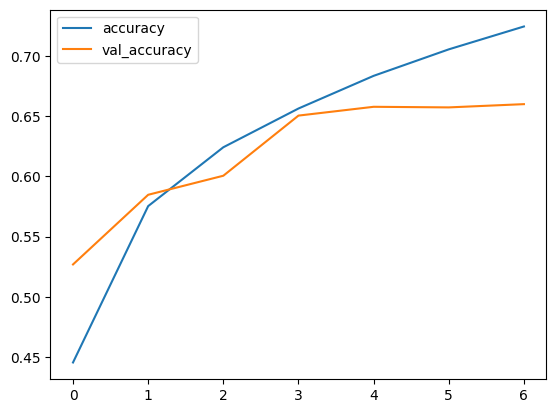

In [23]:
metrics[['accuracy','val_accuracy']].plot()

In [24]:
model.evaluate(x_test,y_cat_test,verbose=0)

[0.9778107404708862, 0.6577000021934509]

In [25]:
from sklearn.metrics import classification_report, confusion_matrix

In [29]:
prediction = model.predict(x_test)

# Convert the prediction probabilities to class labels
predicted_labels = prediction.argmax(axis=-1)

313/313 [==============================] - 2s 6ms/step


In [31]:
# If y_test is one-hot encoded, convert it back to class labels
true_labels = y_cat_test.argmax(axis=-1) if y_cat_test.ndim > 1 else y_test

# Now print the classification report
print(classification_report(true_labels, predicted_labels))

              precision    recall  f1-score   support

           0       0.72      0.69      0.70      1000
           1       0.80      0.77      0.78      1000
           2       0.51      0.57      0.54      1000
           3       0.41      0.60      0.49      1000
           4       0.64      0.50      0.56      1000
           5       0.59      0.54      0.56      1000
           6       0.78      0.71      0.74      1000
           7       0.77      0.67      0.72      1000
           8       0.79      0.73      0.76      1000
           9       0.72      0.79      0.75      1000

    accuracy                           0.66     10000
   macro avg       0.67      0.66      0.66     10000
weighted avg       0.67      0.66      0.66     10000



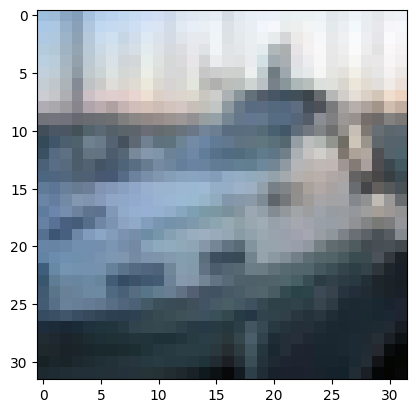

In [38]:
my_image = x_test[2]
plt.imshow(my_image)

In [39]:
y_cat_test[2]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [40]:
import numpy as np

# Add batch dimension (1, 32, 32, 3) 
my_image = np.expand_dims(my_image, axis=0)
# Make a prediction
prediction = model.predict(my_image)

# Get the predicted class (if it's a classification problem)
predicted_class = np.argmax(prediction, axis=-1)  # The index of the class with the highest probability

# Print the predicted class
print(f"Predicted class: {predicted_class}")

1/1 [==============================] - 0s 22ms/step
Predicted class: [1]
